## Observando dados da covid-19 no Brasil

Aplicação básica de chamadas de API's para para visualização do crescimento dos casos de covid-19 no Brasil e a proporção de casos recuperados.
As API's utilizadas no projeto foram:
- Base de dados: https://covid19api.com/
- Gráfico + QR Code: https://quickchart.io/

In [1]:
import requests
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display
from urllib.parse import quote

In [2]:
url_covid = 'https://api.covid19api.com/dayone/country/brazil'
r = requests.get(url_covid)

In [3]:
print(r.status_code)

200


In [4]:
data = r.json()

In [5]:
data_set = []
for item in data:
    data_set.append([item["Date"], item["Confirmed"], item["Deaths"], item["Recovered"], item["Active"]])

In [6]:
df = pd.DataFrame(data_set, columns = ['Data', 'Confirmados', 'Mortes', 'Recuperados', 'Infectados'])

In [7]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
        return datasets
    else:
        return [{
            'label': labels[0],
            'data': y
        }]

In [8]:
def set_title(title = ''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'display': display,
        'text': title
    }

In [9]:
def create_chart(x, y, labels, kind = 'bar', title = ''):
    dataset = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data':{
            'labels': x,
            'datasets': dataset
        },
        'options': {
            'title': options
        }
    }
    
    return chart

In [10]:
def get_api_chart(chart):
    url = 'https://quickchart.io/chart'
    resp = requests.get(f'{url}?c={str(chart)}')
    print(resp.status_code)
    return resp.content #O conteúdo retornado pela API é uma informação binária e não json.

In [11]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [12]:
def display_image(path):
    img_pil = Image.open(path)
    #img_pil.show()
    display(img_pil)

200


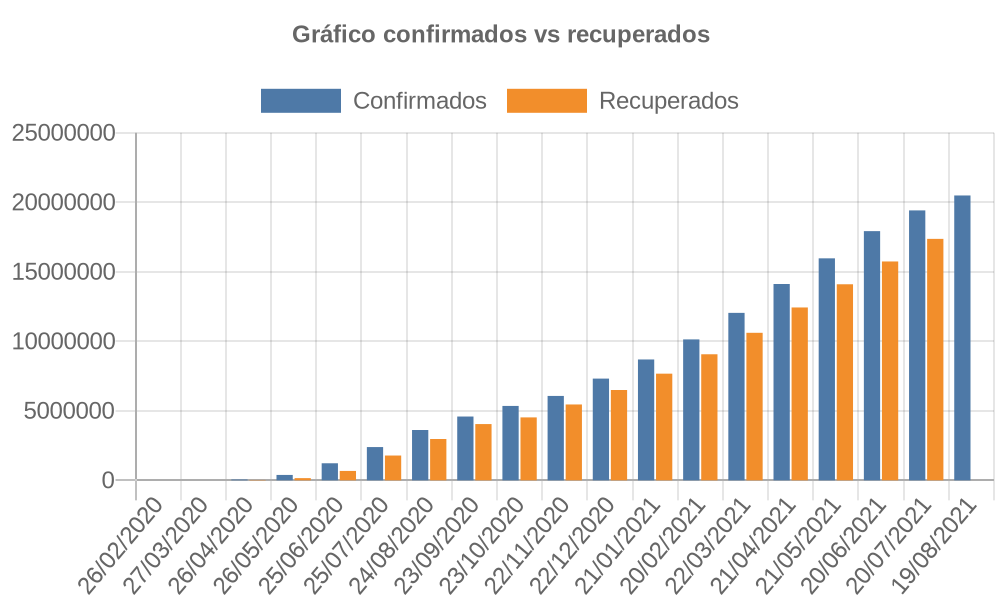

In [13]:
y_data1 = df['Confirmados'][::30].tolist()
    
y_data2 = df['Recuperados'][::30].tolist()
    
labels = ['Confirmados', 'Recuperados']    

x = pd.to_datetime(df['Data'][::30]).dt.strftime('%d/%m/%Y').tolist()
    
chart = create_chart(x, [y_data1, y_data2], labels, title = 'Gráfico confirmados vs recuperados')
chart_content = get_api_chart(chart)
save_image('dados_covid.png', chart_content)
display_image('dados_covid.png')

In [14]:
def get_api_qrcode(link):
    text = quote(link) #parsing do link para url
    url_base = 'https://quickchart.io/qr'
    resp = requests.get(f'{url_base}?text={text}')
    return resp.content

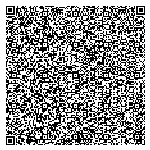

In [15]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')